# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [10]:
# Import der benötigten Bibliotheken

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Anforderungen 2

Datentransformation

In [11]:
# Dataset laden und die ersten 5 Zeilen ausgeben:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

dataset = pd.read_csv(path + '\smoking_drinking_dataset_V0.csv')
body_mass_index = dataset["weight"].astype(np.float64) / ((dataset["height"].astype(np.float64) / 100) * (dataset["height"].astype(np.float64) / 100))

dataset["BMI"] = body_mass_index
dataset_renamed = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Hüftumfang', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdrock', 'BLDS': 'Blutleckdetektor', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker', 'BMI': 'Body-Mass-Index'})
column_names = dataset_renamed.columns.values.tolist()
print(column_names)

dataset_redordered = dataset_renamed.sort_values(by=['Alter'], ascending=True)

dataset = dataset_redordered

dataset.head()

['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Sehkraft_links', 'Sehkraft_rechts', 'Hörkraft_links', 'Hörkraft_rechts', 'Systolischer Blutdruck', 'Diastolischer Blutdrock', 'Blutleckdetektor', 'Totale Cholesterin', 'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'Hemoglobin', 'Urin_Proteine', 'Serum_Kreatinin', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'Raucher_Status', 'Trinker', 'Body-Mass-Index']


,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,60.0,13.9,1.0,1.1,22.0,19.0,14.0,1.0,Y,20.061728
513844,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,2527.0,18.3,3.0,0.9,16.0,13.0,37.0,1.0,Y,21.224490
356547,Male,20,170,65,77.0,0.9,0.9,1.0,1.0,129.0,...,59.0,15.0,1.0,0.9,19.0,12.0,11.0,1.0,N,22.491349
665411,Female,20,155,45,69.0,0.9,1.0,1.0,1.0,111.0,...,35.0,13.9,1.0,0.7,17.0,6.0,14.0,1.0,N,18.730489
845242,Male,20,170,65,78.0,0.9,1.5,1.0,1.0,108.0,...,37.0,16.2,1.0,1.0,21.0,16.0,17.0,1.0,N,22.491349


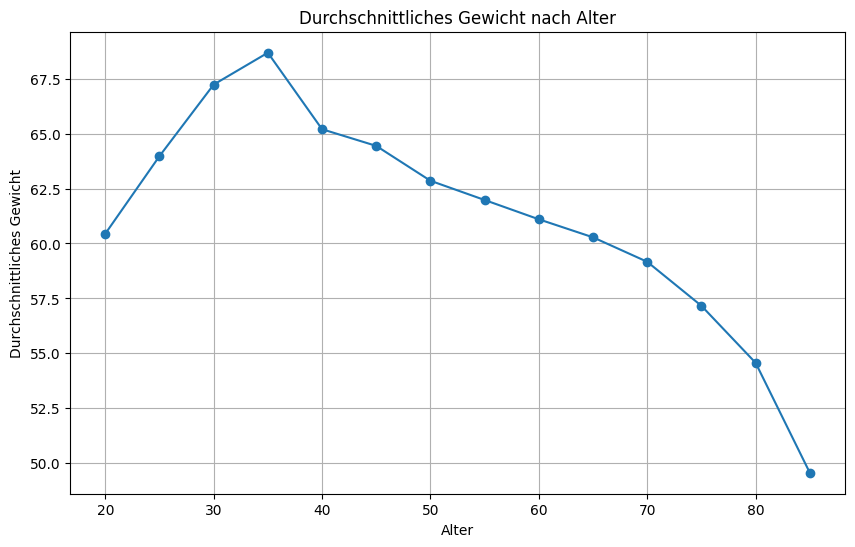

In [12]:
avg_age = dataset.groupby('Alter')['Gewicht'].mean() 

# Liniendiagramm erstellen

plt.figure(figsize=(10, 6)) 
plt.plot(avg_age.index, avg_age.values, marker='o', linestyle='-') 

plt.xlabel('Alter') 
plt.ylabel('Durchschnittliches Gewicht') 
plt.title('Durchschnittliches Gewicht nach Alter') 

plt.grid(True) 
plt.show()


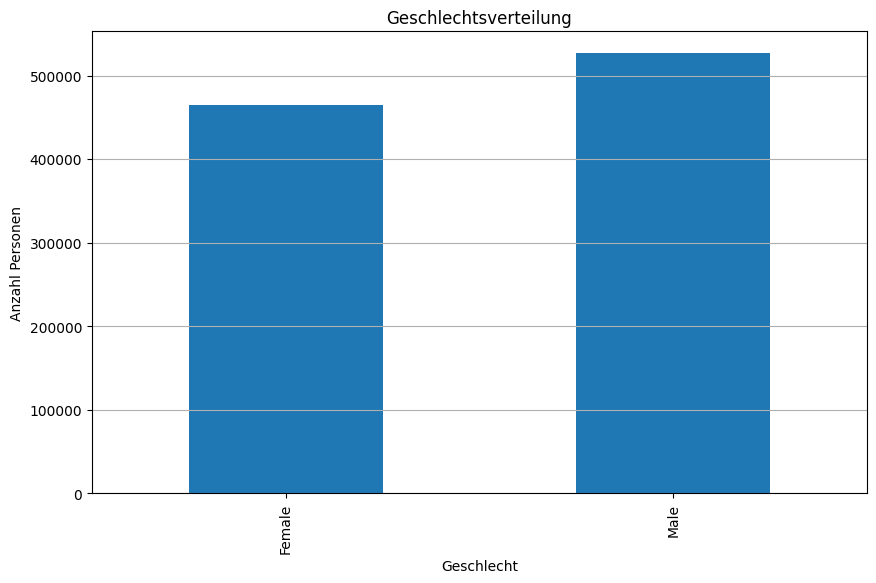

In [13]:
# Berechne relative Häufigkeit der Alterswerte in Prozent 

frequency = dataset['Geschlecht'].sort_values().value_counts(sort=False) 

# Balkendiagramm über die Altersverteilung im Datensatz erstellen und aufsteigend nach Alter sortieren 

plt.figure(figsize=(10, 6)) 
frequency.plot(kind='bar') 
plt.xlabel('Geschlecht') 
plt.ylabel('Anzahl Personen') 
plt.title('Geschlechtsverteilung') 
plt.grid(axis='y') 
plt.show()

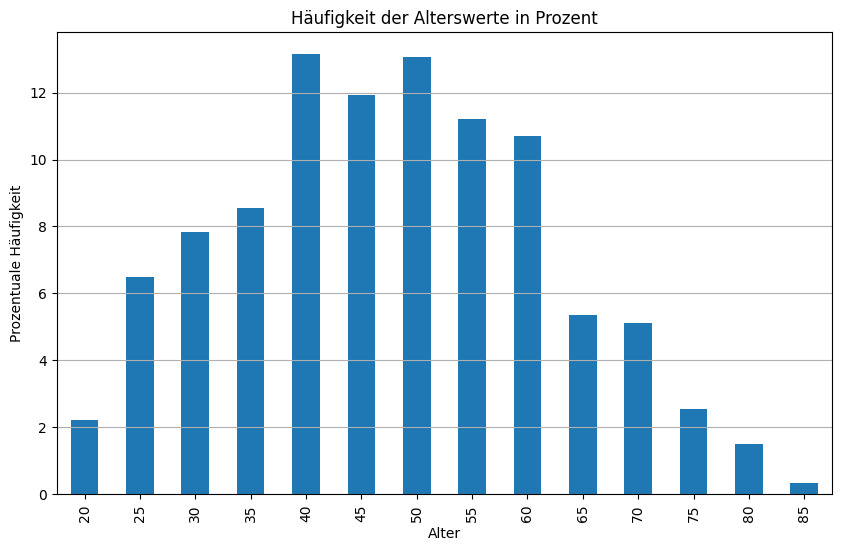

In [14]:
# Berechne relative Häufigkeit der Alterswerte in Prozent 

frequency = (dataset['Alter'].sort_values().value_counts(sort=False) / len(dataset)) * 100 

# Balkendiagramm über die Altersverteilung im Datensatz erstellen und aufsteigend nach Alter sortieren 

plt.figure(figsize=(10, 6)) 
frequency.plot(kind='bar') 
plt.xlabel('Alter') 
plt.ylabel('Prozentuale Häufigkeit') 
plt.title('Häufigkeit der Alterswerte in Prozent') 
plt.grid(axis='y') 
plt.show()

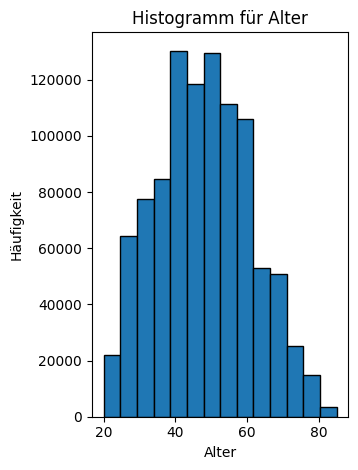

In [15]:
# Histogramm für die Spalte 'Alter' erstellen:

plt.subplot(1, 2, 2).hist(dataset['Alter'], bins=14, edgecolor='black') 
plt.xlabel('Alter') 
plt.ylabel('Häufigkeit') 
plt.title('Histogramm für Alter') 
plt.tight_layout() 
plt.show()

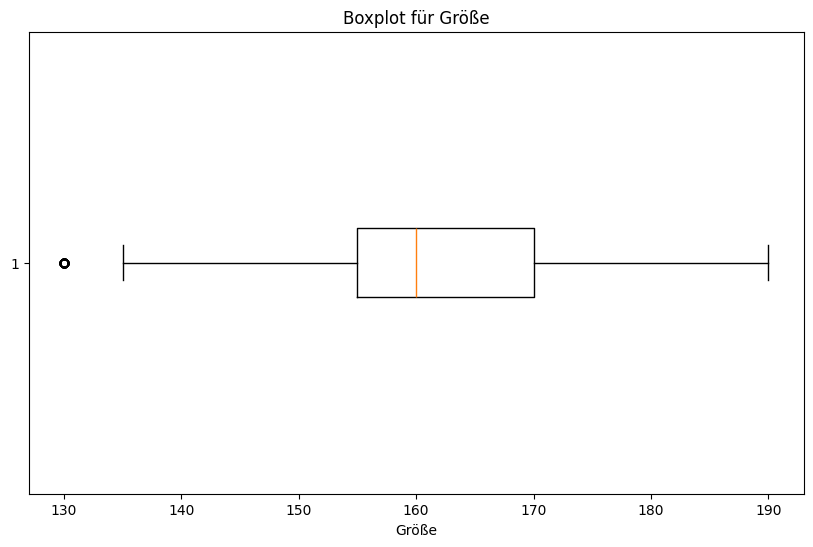

In [16]:
# Einen Boxplot erstellen:

plt.figure(figsize=(10, 6)) 
plt.boxplot(dataset['Größe'], vert=False)

plt.xlabel("Größe")
plt.title('Boxplot für Größe')

plt.show()

In [17]:
# plt.figure(figsize=(10, 6)) 
# plt.boxplot(dataset['Gewicht'], vert=False)

# plt.xlabel("Gewicht")
# plt.title('Boxplot für Gewicht')

# plt.show()

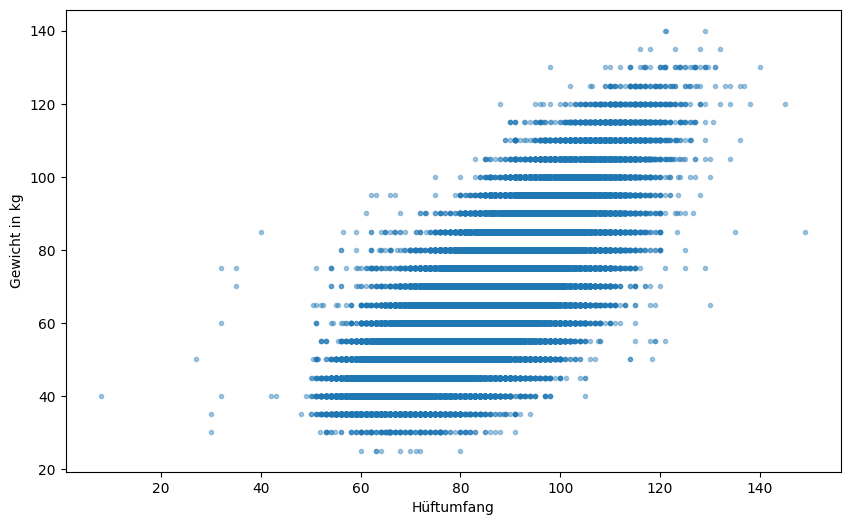

In [18]:
filtered_dataset = dataset[dataset['Hüftumfang'] < 900]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=filtered_dataset['Hüftumfang'],y=filtered_dataset['Gewicht'], marker='.', alpha=0.4)
plt.xlabel('Hüftumfang')
plt.ylabel('Gewicht in kg')
plt.show()

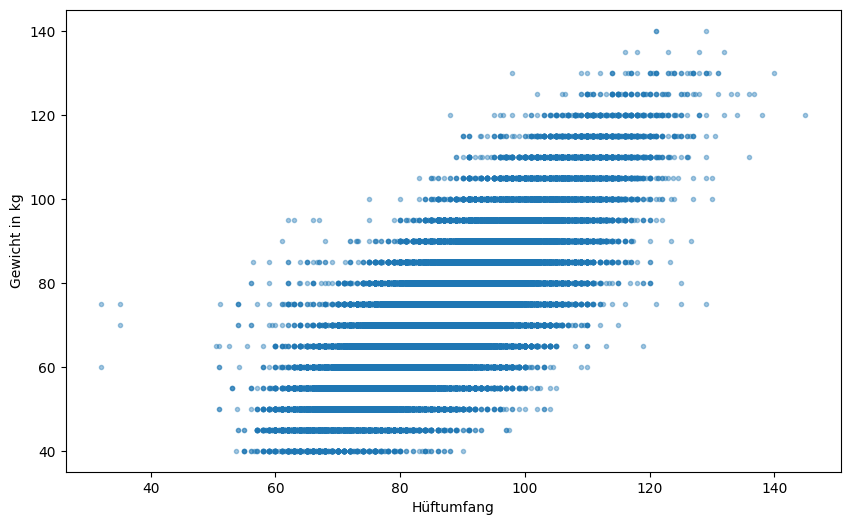

In [19]:
filtered_dataset = dataset[dataset['Hüftumfang'] < 900]

male = filtered_dataset[filtered_dataset['Geschlecht'] == 'Male']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=male['Hüftumfang'],y=male['Gewicht'], marker='.', alpha=0.4)
plt.xlabel('Hüftumfang')
plt.ylabel('Gewicht in kg')
plt.show()

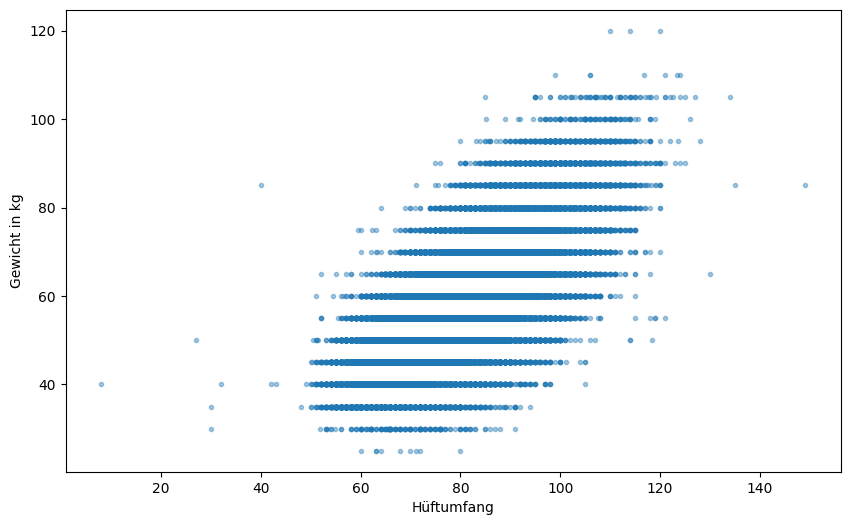

In [20]:
filtered_dataset = dataset[dataset['Hüftumfang'] < 900]

female = filtered_dataset[filtered_dataset['Geschlecht'] == 'Female']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=female['Hüftumfang'],y=female['Gewicht'], marker='.', alpha=0.4)
plt.xlabel('Hüftumfang')
plt.ylabel('Gewicht in kg')
plt.show()

In [21]:
# Sortieren des Dataframes:

sorted_df = dataset.sort_values(by='Alter')
sorted_df.head()

# Eine Sortierung ergibt Sinn, zur besseren Übersicht über die Daten.

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,60.0,13.9,1.0,1.1,22.0,19.0,14.0,1.0,Y,20.061728
608019,Male,20,175,75,83.0,1.0,0.9,1.0,1.0,128.0,...,363.0,15.0,1.0,0.9,18.0,52.0,24.0,1.0,Y,24.489796
971771,Female,20,155,50,67.0,1.0,1.0,1.0,1.0,90.0,...,39.0,13.1,2.0,0.7,17.0,12.0,9.0,1.0,Y,20.811655
971768,Male,20,175,85,91.0,1.0,1.5,1.0,1.0,137.0,...,79.0,15.6,1.0,0.6,23.0,20.0,13.0,3.0,N,27.755102
223791,Female,20,165,65,75.0,0.7,0.8,1.0,1.0,110.0,...,123.0,14.0,1.0,0.7,34.0,54.0,105.0,1.0,Y,23.875115


In [22]:
# Statistische Zusammenfassung einer Spalte:

summary = dataset['Gewicht'].describe()

print(summary)

count    991346.000000
mean         63.284050
std          12.514241
min          25.000000
25%          55.000000
50%          60.000000
75%          70.000000
max         140.000000
Name: Gewicht, dtype: float64


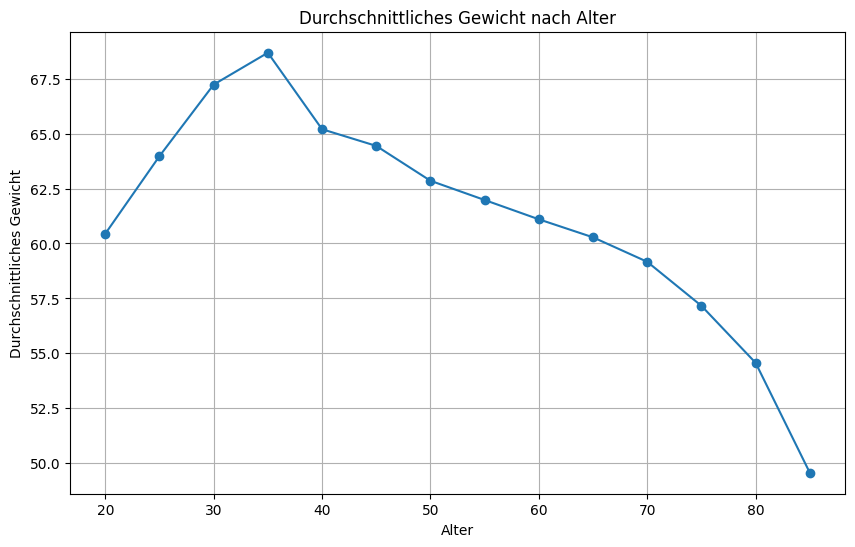

In [23]:
# Gruppierung zur Berechnung des durchschnittlichen Alters:

avg_age = dataset.groupby('Alter')['Gewicht'].mean()

# Liniendiagramm erstellen

plt.figure(figsize=(10, 6)) 
plt.plot(avg_age.index, avg_age.values, marker='o', linestyle='-') 

plt.xlabel('Alter') 
plt.ylabel('Durchschnittliches Gewicht') 
plt.title('Durchschnittliches Gewicht nach Alter') 

plt.grid(True) 
plt.show()


# Die Gruppierung war sinnvoll, um alle Proband*innen zu einem Alter zu gruppieren.

# Erkenntnisse

#1 - Datenstruktur
Die Daten beinhalten fast ausschließlich numerische Werte. Es gibt keine Anamnese zu dem Kunden, die ausführliche Informationen über den Gesundheitszustand offenlegen. Informationen über Vorerkrankungen oder chronische Erkrankungen werden nicht aufgeführt. 

#2 - Geschäftliche Domäne 
Der Datensatz gibt ausführliche Informationen über den Gesundheitszustand des Kunden zum Zeitpunkt der Aufnahme, die für die versicherung von bedeutung sind. Es müssen jedoch einige Annahmen wie z.B erhöhter Blutdruck = höheres Risiko für Herzkreislauferkrankungen. 